#Programming assignment #6

## Course: CHE1147H - Data Mining in Engineering

#**1 Model performance**

A very common question in every machine learning problem is: how many data samples
do we need to model the system behaviour adequately. Unfortunately, just like many other
topics in machine learning, there is no straight answer. In many toy problems presented
in textbooks, a classification problem is solved with only 50-100 data points. In real world
problems, a classification problem may be very diffcult even with millions of data points.
Generally, the model performance depends on the following factors:
1. Are the classes easily separated or they are pretty mixed? Are they separated linearly
or non-linearly? Is a linear or non-linear model used?
2. The features quality. Do they carry information with respect to the output/class? More
features does not necessarily mean better performance. The famous quote "Garbage
in, garbage out" is used to describe uninformative features.
3. The number of data points. Intuitively, more data points lead to better performance.
But after some point, it is expected that the increase in model performance diminishes.


The last point is the subject of this section. From a business perspective, you want to know
how many samples you need to model the clients behaviour adequately. This information is
crucial when the conditions change and you may want to reequest your model.

For example, with Covid-19 the clients behaviour changed dramatically. Let's assume
that you are at the beginning of Covid-19 in March 2020 and your manager is asking you
to request the retail response problem you solved in Assignment #5 (apologies for putting you
mentally back at the beginning of Covid-19, we are almost out of it). The question that
comes with this request is: how many data points do you need to request the model with
adequate performance?


You know that generally more data points means better performance, but you cannot
wait for too long to collect new data post-March 2020 because your business will not have a
reliable model for as long as you collect data. A similar situation may appear in an industrial
setting, let's say after the annual maintenance of a machine or a reactor. How many data
points do you need to model the machine or reactor behaviour after the maintenance?

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



##**1.1 Dataset size vs model performance**

Here, you will quantify the relationship between the dataset size and the model performance. Essentially, you will answer the question: how much data is enough to model client behaviour? In order to do this, you will pick the best single tree model you created in Assignment #5 and evaluate it with datasets of different sizes using the monthly features you created in Assignment #3.

   Perform the evaluation with the following steps:

### **0.00000**  Prepare

In [186]:
file_RDR = '/content/Retail_Data_Response.csv'
RDR = pd.read_csv(file_RDR)
RDR

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [187]:
# use monthly features
file_mrf = '/content/mth_rolling_features.xlsx'
file_mdc = '/content/mth_day_counts.xlsx'
file_dslt = '/content/days_since_last_txn.xlsx'

mrf = pd.read_excel(file_mrf, index_col = 0)
mrf

,ME_DT,CLNT_NO,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,2011-05-31,CS1112,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-06-30,CS1112,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-07-31,CS1112,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-08-31,CS1112,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-09-30,CS1112,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,2014-11-30,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,2014-12-31,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,2015-01-31,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,2015-02-28,CS9000,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [188]:
mdc = pd.read_excel(file_mdc, index_col = 0)
mdc

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,0,0,0,0,0,0,0
1,CS1112,2011-06-30,0,0,0,0,0,0,1
2,CS1112,2011-07-31,0,0,0,0,0,0,0
3,CS1112,2011-08-31,1,0,0,0,0,0,0
4,CS1112,2011-09-30,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0,0,0,0,0
323779,CS9000,2014-12-31,0,0,0,0,0,0,0
323780,CS9000,2015-01-31,0,0,0,0,0,0,0
323781,CS9000,2015-02-28,0,0,1,0,0,0,0


In [189]:
dslt = pd.read_excel(file_dslt)
dslt

,CLNT_NO,ME_DT,days_since_last_txn
0,CS1112,2011-05-31,NaN
1,CS1112,2011-06-30,15.0
2,CS1112,2011-07-31,46.0
3,CS1112,2011-08-31,12.0
4,CS1112,2011-09-30,42.0
...,...,...,...
323778,CS9000,2014-11-30,98.0
323779,CS9000,2014-12-31,129.0
323780,CS9000,2015-01-31,160.0
323781,CS9000,2015-02-28,0.0


In [190]:
#monthly_features_outputs
monthly_features_outputs = pd.merge(mrf, dslt, on = ['CLNT_NO', 'ME_DT'], how = 'left')
monthly_features_outputs

,ME_DT,CLNT_NO,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn
0,2011-05-31,CS1112,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-06-30,CS1112,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2,2011-07-31,CS1112,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
3,2011-08-31,CS1112,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
4,2011-09-30,CS1112,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,2014-11-30,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,98.0
323779,2014-12-31,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,129.0
323780,2015-01-31,CS9000,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,160.0
323781,2015-02-28,CS9000,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,0.0


In [191]:
monthly_features_outputs_final = pd.merge(mdc, monthly_features_outputs, on = ['CLNT_NO', 'ME_DT'], how = 'left')
monthly_features_outputs_final

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,mth_txn_amt_sum,...,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn
0,CS1112,2011-05-31,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,0,0,0,0,0,0,1,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2,CS1112,2011-07-31,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
3,CS1112,2011-08-31,1,0,0,0,0,0,0,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
4,CS1112,2011-09-30,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0,0,0,0,0,0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,98.0
323779,CS9000,2014-12-31,0,0,0,0,0,0,0,0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,129.0
323780,CS9000,2015-01-31,0,0,0,0,0,0,0,0,...,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,160.0
323781,CS9000,2015-02-28,0,0,1,0,0,0,0,34,...,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,0.0


In [192]:
#monthly features outputs with RDR
monthly_features_outputs_final_RDR = pd.merge(monthly_features_outputs_final, RDR, left_on = ['CLNT_NO'], right_on = ['customer_id'], how = 'left')
monthly_features_outputs_final_RDR = monthly_features_outputs_final_RDR.drop(monthly_features_outputs_final_RDR.columns[-2], axis = 1)
monthly_features_outputs_final_RDR.fillna(0, inplace = True)
monthly_features_outputs_final_RDR

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,mth_txn_amt_sum,...,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,CS1112,2011-06-30,0,0,0,0,0,0,1,56,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,15.0,0.0
2,CS1112,2011-07-31,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,46.0,0.0
3,CS1112,2011-08-31,1,0,0,0,0,0,0,96,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,12.0,0.0
4,CS1112,2011-09-30,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0,0,0,0,0,0,...,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,98.0,0.0
323779,CS9000,2014-12-31,0,0,0,0,0,0,0,0,...,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,129.0,0.0
323780,CS9000,2015-01-31,0,0,0,0,0,0,0,0,...,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,160.0,0.0
323781,CS9000,2015-02-28,0,0,1,0,0,0,0,34,...,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,0.0,0.0


### **0.1** Separate the monthly_features_outputs_final_RDR to the X and y in to data frames.

In [193]:
#monthly_features_outputs_final_RDR
#input
X_mon = monthly_features_outputs_final_RDR.drop(['CLNT_NO', 'ME_DT', 'response'], axis = 1)
#output
y_mon = monthly_features_outputs_final_RDR['response']

In [194]:
X_mon

,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,...,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn
0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0,0,0,0,0,0,1,56,1,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,15.0
2,0,0,0,0,0,0,0,0,0,56.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,46.0
3,1,0,0,0,0,0,0,96,1,152.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,12.0
4,0,0,0,0,0,0,0,0,0,96.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,0,0,0,0,0,0,0,0,0,0.0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,98.0
323779,0,0,0,0,0,0,0,0,0,0.0,...,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,129.0
323780,0,0,0,0,0,0,0,0,0,0.0,...,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,160.0
323781,0,0,1,0,0,0,0,34,1,34.0,...,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,0.0


In [195]:
y_mon

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
323778    0.0
323779    0.0
323780    0.0
323781    0.0
323782    0.0
Name: response, Length: 323783, dtype: float64

### **1. Split the train/test sets with 9:1 ratio This split should give you approximately 291k/32k samples in train/test set, respectively.**

In [196]:
from sklearn.model_selection import train_test_split

X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_mon, y_mon, test_size = 1/10, train_size = 9/10, random_state = 1147)
X_train_monthly

,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,...,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn
144673,0,0,0,0,0,0,0,0,0,35.0,...,2.0,0.333333,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,40.0
225806,0,0,0,0,0,0,0,0,0,232.0,...,3.0,0.500000,3.0,269.0,22.416667,232.0,4.0,0.333333,3.0,67.0
315025,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.000000,0.0,54.0,4.500000,42.0,2.0,0.166667,1.0,233.0
269028,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
321565,0,0,0,0,0,0,0,0,0,55.0,...,3.0,0.500000,2.0,182.0,15.166667,74.0,4.0,0.333333,2.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168017,0,1,0,0,0,0,0,77,1,77.0,...,4.0,0.666667,2.0,372.0,31.000000,145.0,5.0,0.416667,2.0,27.0
27471,0,0,0,0,0,0,0,0,0,75.0,...,3.0,0.500000,1.0,169.0,14.083333,75.0,3.0,0.250000,1.0,47.0
289455,0,1,0,0,0,0,0,14,1,14.0,...,1.0,0.166667,1.0,138.0,11.500000,74.0,5.0,0.416667,1.0,10.0
231767,0,1,0,0,0,0,0,46,1,94.0,...,8.0,1.333333,4.0,0.0,0.000000,0.0,0.0,0.000000,0.0,5.0


In [197]:
X_test_monthly

,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,...,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,days_since_last_txn
159627,0,1,0,0,0,0,0,59,1,160.0,...,3.0,0.500000,1.0,381.0,31.750000,101.0,5.0,0.416667,1.0,11.0
57226,0,0,0,0,0,0,0,0,0,42.0,...,5.0,0.833333,2.0,585.0,48.750000,130.0,9.0,0.750000,2.0,33.0
92031,0,1,0,0,0,0,0,71,1,147.0,...,4.0,0.666667,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,28.0
62305,0,0,0,0,0,0,0,0,0,244.0,...,3.0,0.500000,2.0,244.0,20.333333,181.0,3.0,0.250000,2.0,31.0
161761,0,0,0,1,0,0,1,83,2,166.0,...,7.0,1.166667,2.0,760.0,63.333333,142.0,11.0,0.916667,2.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150770,0,0,0,0,0,0,0,0,0,72.0,...,1.0,0.166667,1.0,261.0,21.750000,79.0,4.0,0.333333,1.0,71.0
140932,1,0,0,0,0,0,0,63,1,63.0,...,5.0,0.833333,2.0,630.0,52.500000,204.0,9.0,0.750000,3.0,19.0
297314,0,0,0,0,0,0,0,0,0,202.0,...,5.0,0.833333,4.0,412.0,34.333333,202.0,8.0,0.666667,4.0,32.0
236087,0,0,0,0,0,0,0,0,0,63.0,...,1.0,0.166667,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,49.0


In [198]:
y_train_monthly

144673    0.0
225806    0.0
315025    0.0
269028    0.0
321565    0.0
         ... 
168017    0.0
27471     1.0
289455    0.0
231767    0.0
203900    0.0
Name: response, Length: 291404, dtype: float64

In [199]:
y_test_monthly

159627    0.0
57226     0.0
92031     0.0
62305     0.0
161761    0.0
         ... 
150770    0.0
140932    1.0
297314    0.0
236087    0.0
49720     0.0
Name: response, Length: 32379, dtype: float64

### **2. Initialize and create a for loop in which you take N samples (e.g. 50), build a tree model with the N samples and evaluate the test set AUC. Repeat the sampling process 10 times and append the test set AUC. The following table shows the desired output:**

|N = 50 samples||
| :---:||
|sample#  |   TestAUC|
|1|0.545|
|2|0.561|
|...|...|
|10|0.551|




### **From this table, you can calculate the mean and standard deviation of the test AUC for N samples.**

In [200]:
print(np.unique(y_train_monthly))
print(np.unique(y_test_monthly))


[0. 1.]
[0. 1.]


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score

import numpy as np


def DecisionTree_model_evaluate(N):
  auc_test = []

  # times 10
  for i in range(10):
    indices = np.random.choice(len(X_train_monthly), N)
    X_train_sampled = X_train_monthly.iloc[indices]
    y_train_sampled = y_train_monthly.iloc[indices]

    model = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', random_state = 1147)
    model.fit(X_train_sampled, y_train_sampled)

    y_pred_probability = model.predict_proba(X_test_monthly)[:, 1]
    #calculate Testing AUC
    fpr_test_mon, tpr_test_mon, _ = roc_curve(y_test_monthly, y_pred_probability)
    auc_test.append(auc(fpr_test_mon, tpr_test_mon))

    auc_mean = np.mean(auc_test)
    auc_std = np.std(auc_test)

  return auc_test, auc_mean, auc_std


test_auc, mean_auc, std_auc = DecisionTree_model_evaluate(50)




In [202]:
test_auc

[0.4709212284409564,
 0.4965434548209336,
 0.5330235250002807,
 0.4978277842311917,
 0.5251929103829258,
 0.5033460256030996,
 0.4951987934950922,
 0.5073546406048799,
 0.5276067039463876,
 0.5019433613714989]

In [203]:
df = pd.DataFrame()
df['sample#'] = list(range(1,11))
df['Test AUC'] = test_auc

df

,sample#,Test AUC
0,1,0.470921
1,2,0.496543
2,3,0.533024
3,4,0.497828
4,5,0.525193
5,6,0.503346
6,7,0.495199
7,8,0.507355
8,9,0.527607
9,10,0.501943


In [204]:
print('The mean and standard deviation of the test AUC for N = 50 samples are: ', '\nmean: ', mean_auc, 'std: ', std_auc)

The mean and standard deviation of the test AUC for N = 50 samples are:  
mean:  0.5058958427897247 std:  0.017590089431748463


### **3. Repeat the procedure you performed in the previous step for different sample size N (e.g. 100, 500, 1000, 2000, 5000, 10000)**

In [205]:
#100
test_auc_100, mean_auc_100, std_auc_100 = DecisionTree_model_evaluate(100)
df_100 = pd.DataFrame()
df_100['sample#'] = list(range(1,11))
df_100['Test AUC'] = test_auc_100

df_100

,sample#,Test AUC
0,1,0.523602
1,2,0.506208
2,3,0.514953
3,4,0.497680
4,5,0.526728
5,6,0.518108
6,7,0.442293
7,8,0.517052
8,9,0.514044
9,10,0.502973


In [206]:
print('The mean and standard deviation of the test AUC for N = 100 samples are: ', '\nmean: ', mean_auc_100, 'std: ', std_auc_100)

The mean and standard deviation of the test AUC for N = 100 samples are:  
mean:  0.5063640321285516 std:  0.02299731908357034


In [207]:
#500
test_auc_500, mean_auc_500, std_auc_500 = DecisionTree_model_evaluate(500)
df_500 = pd.DataFrame()
df_500['sample#'] = list(range(1,11))
df_500['Test AUC'] = test_auc_500

df_500

,sample#,Test AUC
0,1,0.494250
1,2,0.526226
2,3,0.560829
3,4,0.549804
4,5,0.523985
5,6,0.519366
6,7,0.540781
7,8,0.524068
8,9,0.512088
9,10,0.493774


In [208]:
print('The mean and standard deviation of the test AUC for N = 500 samples are: ', '\nmean: ', mean_auc_500, 'std: ', std_auc_500)

The mean and standard deviation of the test AUC for N = 500 samples are:  
mean:  0.5245170784233749 std:  0.02065933098473907


In [209]:
#1000
test_auc_1000, mean_auc_1000, std_auc_1000 = DecisionTree_model_evaluate(1000)
df_1000 = pd.DataFrame()
df_1000['sample#'] = list(range(1,11))
df_1000['Test AUC'] = test_auc_1000

df_1000

,sample#,Test AUC
0,1,0.529883
1,2,0.550977
2,3,0.555183
3,4,0.599788
4,5,0.547724
5,6,0.531737
6,7,0.541685
7,8,0.554456
8,9,0.545632
9,10,0.505234


In [210]:
print('The mean and standard deviation of the test AUC for N = 1000 samples are: ', '\nmean: ', mean_auc_1000, 'std: ', std_auc_1000)

The mean and standard deviation of the test AUC for N = 1000 samples are:  
mean:  0.5462299789922203 std:  0.02284726869764468


In [211]:
#2000
test_auc_2000, mean_auc_2000, std_auc_2000 = DecisionTree_model_evaluate(2000)
df_2000 = pd.DataFrame()
df_2000['sample#'] = list(range(1,11))
df_2000['Test AUC'] = test_auc_2000

df_2000

,sample#,Test AUC
0,1,0.582904
1,2,0.579852
2,3,0.567460
3,4,0.558672
4,5,0.548673
5,6,0.575811
6,7,0.554236
7,8,0.579702
8,9,0.559402
9,10,0.577476


In [212]:
print('The mean and standard deviation of the test AUC for N = 2000 samples are: ', '\nmean: ', mean_auc_2000, 'std: ', std_auc_2000)

The mean and standard deviation of the test AUC for N = 2000 samples are:  
mean:  0.5684187318424779 std:  0.011716496163847932


In [213]:
#5000
test_auc_5000, mean_auc_5000, std_auc_5000 = DecisionTree_model_evaluate(5000)
df_5000 = pd.DataFrame()
df_5000['sample#'] = list(range(1,11))
df_5000['Test AUC'] = test_auc_5000

df_5000

,sample#,Test AUC
0,1,0.587411
1,2,0.582025
2,3,0.598904
3,4,0.594608
4,5,0.601310
5,6,0.601002
6,7,0.600831
7,8,0.596645
8,9,0.589284
9,10,0.589686


In [214]:
print('The mean and standard deviation of the test AUC for N = 5000 samples are: ', '\nmean: ', mean_auc_5000, 'std: ', std_auc_5000)

The mean and standard deviation of the test AUC for N = 5000 samples are:  
mean:  0.5941706951866426 std:  0.006386943644140279


In [215]:
#10000
test_auc_10000, mean_auc_10000, std_auc_10000 = DecisionTree_model_evaluate(10000)
df_10000 = pd.DataFrame()
df_10000['sample#'] = list(range(1,11))
df_10000['Test AUC'] = test_auc_10000

df_10000

,sample#,Test AUC
0,1,0.593914
1,2,0.614841
2,3,0.614358
3,4,0.600582
4,5,0.610298
5,6,0.615846
6,7,0.609738
7,8,0.603493
8,9,0.600249
9,10,0.607121


In [216]:
print('The mean and standard deviation of the test AUC for N = 10000 samples are: ', '\nmean: ', mean_auc_10000, 'std: ', std_auc_10000)

The mean and standard deviation of the test AUC for N = 10000 samples are:  
mean:  0.6070439718166465 std:  0.006946501678457858


In [217]:
#15000
test_auc_15000, mean_auc_15000, std_auc_15000 = DecisionTree_model_evaluate(15000)
df_15000 = pd.DataFrame()
df_15000['sample#'] = list(range(1,11))
df_15000['Test AUC'] = test_auc_15000

df_15000

,sample#,Test AUC
0,1,0.618561
1,2,0.615403
2,3,0.608123
3,4,0.604971
4,5,0.616916
5,6,0.611129
6,7,0.611798
7,8,0.611051
8,9,0.612055
9,10,0.612720


In [218]:
print('The mean and standard deviation of the test AUC for N = 15000 samples are: ', '\nmean: ', mean_auc_15000, 'std: ', std_auc_15000)

The mean and standard deviation of the test AUC for N = 15000 samples are:  
mean:  0.6122726605707752 std:  0.0038040553754354034


In [219]:
#20000
test_auc_20000, mean_auc_20000, std_auc_20000 = DecisionTree_model_evaluate(20000)
df_20000 = pd.DataFrame()
df_20000['sample#'] = list(range(1,11))
df_20000['Test AUC'] = test_auc_20000

df_20000

,sample#,Test AUC
0,1,0.622182
1,2,0.620777
2,3,0.618316
3,4,0.623049
4,5,0.616448
5,6,0.624962
6,7,0.611687
7,8,0.618145
8,9,0.615989
9,10,0.623828


In [220]:
print('The mean and standard deviation of the test AUC for N = 20000 samples are: ', '\nmean: ', mean_auc_20000, 'std: ', std_auc_20000)

The mean and standard deviation of the test AUC for N = 20000 samples are:  
mean:  0.6195383796917457 std:  0.003948403103641305


In [221]:
#30000
test_auc_30000, mean_auc_30000, std_auc_30000 = DecisionTree_model_evaluate(30000)
df_30000 = pd.DataFrame()
df_30000['sample#'] = list(range(1,11))
df_30000['Test AUC'] = test_auc_30000

df_30000

,sample#,Test AUC
0,1,0.621943
1,2,0.617379
2,3,0.626577
3,4,0.617727
4,5,0.622425
5,6,0.625183
6,7,0.625994
7,8,0.625919
8,9,0.624732
9,10,0.626576


In [222]:
print('The mean and standard deviation of the test AUC for N = 30000 samples are: ', '\nmean: ', mean_auc_30000, 'std: ', std_auc_30000)

The mean and standard deviation of the test AUC for N = 30000 samples are:  
mean:  0.6234454982241161 std:  0.003311934735046296


In [223]:
#50000
test_auc_50000, mean_auc_50000, std_auc_50000 = DecisionTree_model_evaluate(50000)
df_50000 = pd.DataFrame()
df_50000['sample#'] = list(range(1,11))
df_50000['Test AUC'] = test_auc_50000

df_50000

,sample#,Test AUC
0,1,0.628935
1,2,0.629482
2,3,0.623654
3,4,0.626815
4,5,0.627654
5,6,0.627545
6,7,0.628067
7,8,0.631300
8,9,0.622621
9,10,0.628031


### **4. Build a table that contains the values of:**



*   Sample size N
*   Test AUC mean
*   Test AUC standard deviation




In [224]:
df_Q4 = pd.DataFrame()


df_Q4['sample size N'] = [50, 100, 500, 1000, 2000, 5000, 10000, 15000, 20000, 30000, 50000]
df_Q4['Test AUC mean'] = [mean_auc, mean_auc_100, mean_auc_500, mean_auc_1000, mean_auc_2000, mean_auc_5000, mean_auc_10000, mean_auc_15000, mean_auc_20000, mean_auc_30000, mean_auc_50000]
df_Q4['Test AUC standard deviation'] = [std_auc, std_auc_100, std_auc_500, std_auc_1000, std_auc_2000, std_auc_5000, std_auc_10000, std_auc_15000, std_auc_20000, std_auc_30000, std_auc_50000]

df_Q4


,sample size N,Test AUC mean,Test AUC standard deviation
0,50,0.505896,0.017590
1,100,0.506364,0.022997
2,500,0.524517,0.020659
3,1000,0.546230,0.022847
4,2000,0.568419,0.011716
5,5000,0.594171,0.006387
6,10000,0.607044,0.006947
7,15000,0.612273,0.003804
8,20000,0.619538,0.003948
9,30000,0.623445,0.003312


### **5. Using the matplotlib function errorbar, plot the model performance captured in the test AUC mean and standard deviation as a function of the sample size. From this plot, can you estimate what is the minimum number of samples needed to model the behaviour adequately?**

<function matplotlib.pyplot.show(close=None, block=None)>

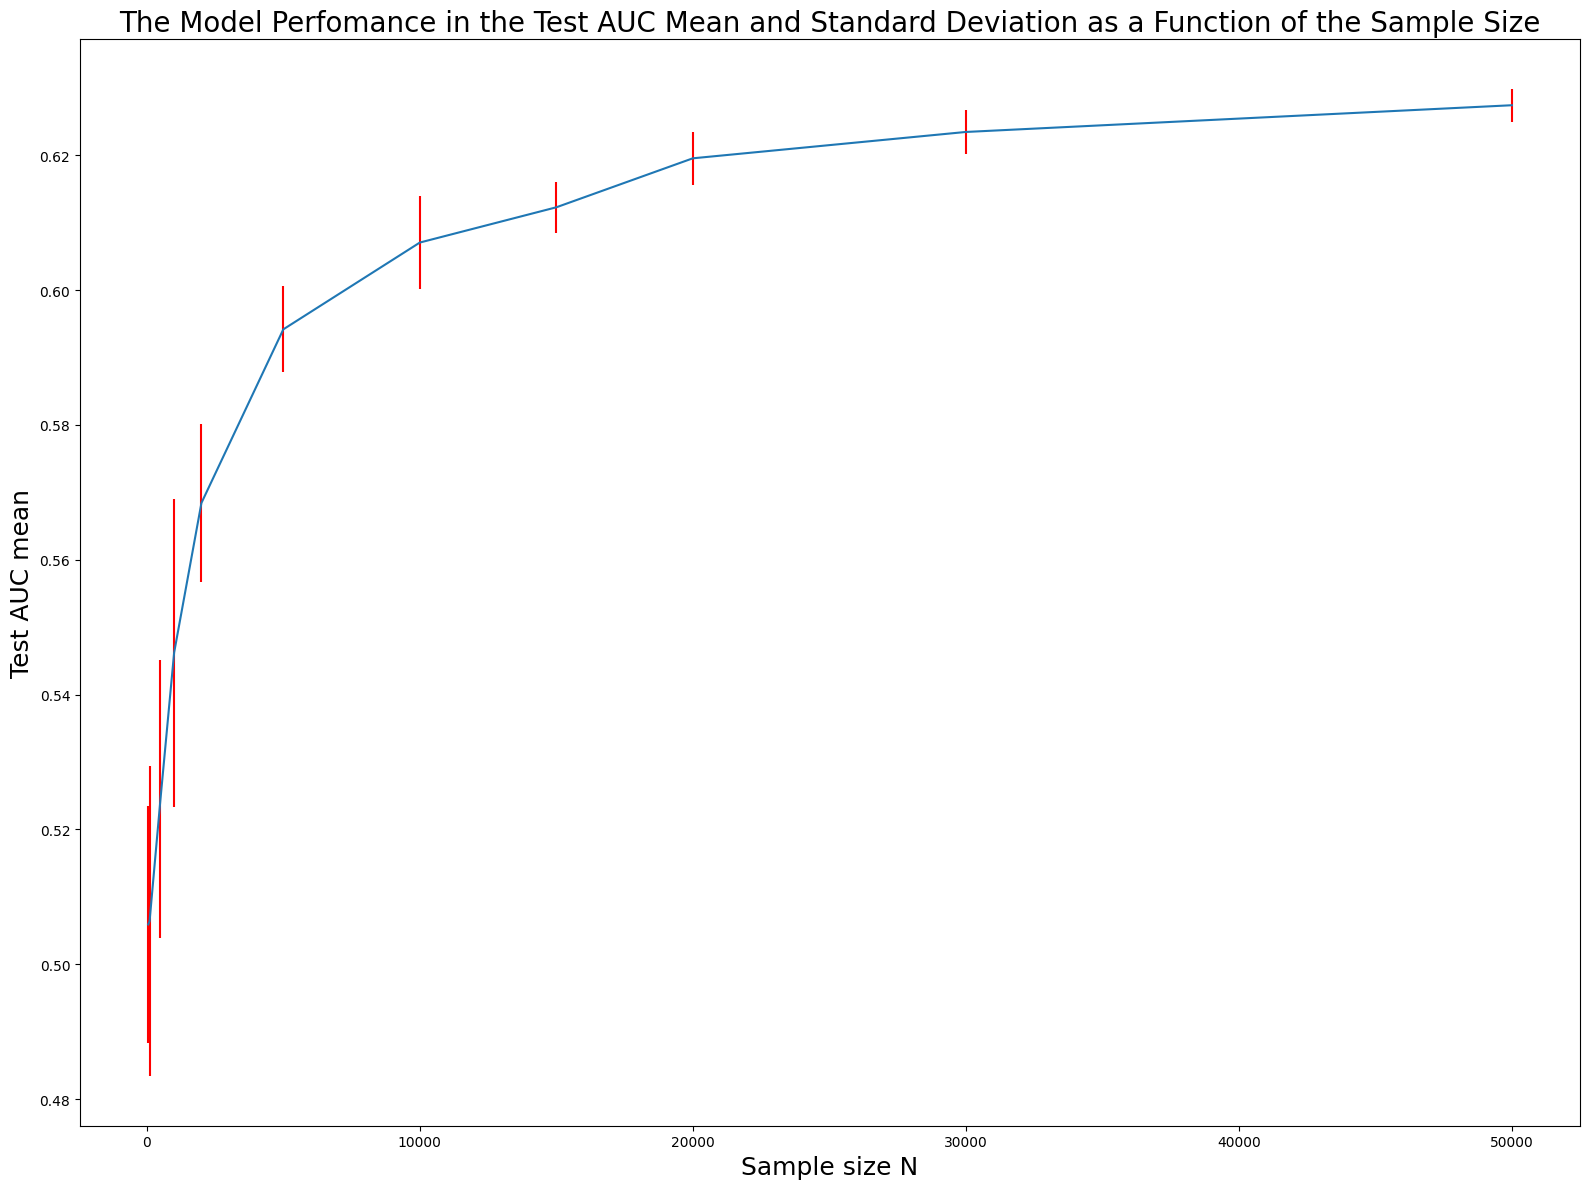

In [225]:
import matplotlib.pyplot as plt


plt.figure(figsize = (16, 12))
plt.errorbar(df_Q4['sample size N'], df_Q4['Test AUC mean'], df_Q4['Test AUC standard deviation'], ecolor = 'red')

plt.xlabel('Sample size N', fontsize = 18)
plt.ylabel('Test AUC mean', fontsize = 18)
plt.title('The Model Perfomance in the Test AUC Mean and Standard Deviation as a Function of the Sample Size', fontsize = 20)

plt.tight_layout()
plt.show

**Answer:**

The plot shows The elbow point is simple size N=10000, and in N=15000 std is lower than the N=10000 and N=20000, So I want to estimate the Sample size N=15000 as the minimum number of samples needed to model the
behaviour adequately
